# 課題

1. $K=1$，$\omega_n=1$rad/sの2次システムの$\zeta=0.1，0.3，0.8$の3通りについて，ゲイン線図と位相線図をそれぞれ重ねてプロットせよ．$\omega$の範囲は$10^{-1}$rad/sから$10^1$rad/sとする．

2. Python-controlで$K=1$，$\omega_n=1$rad/s，$\zeta=0.3$の2次システムの共振角周波数を調べ，講義で求めた式で計算した場合と一致することを確認せよ．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

### (1). $K=1$，$\omega_n=1$rad/sの2次システムの$\zeta=0.1，0.3，0.8$の3通りについて，ゲイン線図と位相線図をそれぞれ重ねてプロットせよ．$\omega$の範囲は$10^{-1}$rad/sから$10^1$rad/sとする．

In [2]:
K = 1.0 
zeta1 = 0.1
zeta2 = 0.3
zeta3 = 0.8
wn = 1.0

n = [K * wn**2]
d1 = [1, 2*zeta1*wn, wn**2]
d2 = [1, 2*zeta2*wn, wn**2]
d3 = [1, 2*zeta3*wn, wn**2]

P1 = tf(n, d1)
P2 = tf(n, d2)
P3 = tf(n, d3)

w = np.logspace(-1, 1, 1000000)

In [3]:
gain1, phase1, w = bode(P1, w, plot=False)
g_dB1 = 20 * np.log10(gain1)
p_deg1 = phase1 * 180 / np.pi

gain2, phase2, w = bode(P2, w, plot=False)
g_dB2 = 20 * np.log10(gain2)
p_deg2 = phase2 * 180 / np.pi

gain3, phase3, w = bode(P3, w, plot=False)
g_dB3 = 20 * np.log10(gain3)
p_deg3 = phase3 * 180 / np.pi

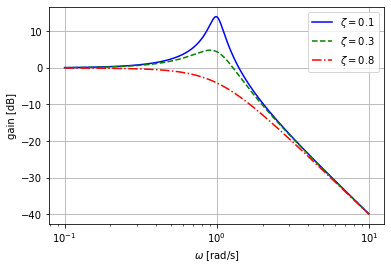

In [4]:
plt.semilogx(w, g_dB1, label="$\zeta=0.1$", color="blue")
plt.semilogx(w, g_dB2, label="$\zeta=0.3$", color="green", linestyle="--")
plt.semilogx(w, g_dB3, label="$\zeta=0.8$", color="red", linestyle="-.")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("gain [dB]")
plt.legend()
plt.grid()
plt.show()

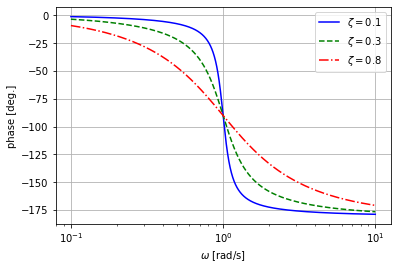

In [5]:
plt.semilogx(w, p_deg1, label="$\zeta=0.1$", color="blue")
plt.semilogx(w, p_deg2, label="$\zeta=0.3$", color="green", linestyle="--")
plt.semilogx(w, p_deg3, label="$\zeta=0.8$", color="red", linestyle="-.")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("phase [deg.]")
plt.legend()
plt.grid()
plt.show()

### (2). Python-controlで$K=1$，$\omega_n=1$rad/s，$\zeta=0.3$の2次システムの共振角周波数を調べ，講義で求めた式で計算した場合と一致することを確認せよ．

講義で求めた式で計算した場合の2次システムの共振角周波数は以下のようになる．

\begin{eqnarray}
\omega_r &=& +\sqrt{1-2\zeta^2}\omega_n \nonumber \\ \nonumber
&=& +\sqrt{1-2\cdot (0.3)^2}\cdot 1.0 \\ \nonumber
&=& +\sqrt{0.82} \\ \nonumber
&\approx& 0.905538513813742
\end{eqnarray}

Python-controlで共振角周波数を求めると以下のようになる．

In [6]:
index_max = np.argmax(gain2)
wr = w[index_max]
print("wr = {}".format(wr))

wr = 0.9055385778571656


上記の結果より，Python-controlで調べた共振角周波数と，講義で求めた式で計算した共振角周波数はほぼ一致していることが確認できる．